In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
X = 6*np.random.rand(100,1) - 3
y = 0.5*X**2 + X + 2 + np.random.randn(100,1)

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(80, 1) (20, 1) (80, 1) (20, 1)


In [26]:
degree = 10
# Create polynomial features
poly = PolynomialFeatures(degree=degree, include_bias=True)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [27]:
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)

LinearRegression()

In [28]:
y_pred = poly_model.predict(X_test_poly)

In [29]:
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
r2 = r2_score(y_test, y_pred)
print(f"R-squared Score: {r2}")

Mean Squared Error: 1.1854625807361987
R-squared Score: 0.8643247910807753


In [30]:
print("Coefficients:", poly_model.coef_)
print("Intercept:", poly_model.intercept_)

Coefficients: [[ 0.00000000e+00  6.31591684e-02  1.66537535e+00  7.85801777e-01
  -8.07985211e-01 -2.36836851e-01  1.93936293e-01  2.95111725e-02
  -1.93147802e-02 -1.29446218e-03  6.98281422e-04]]
Intercept: [1.78765357]


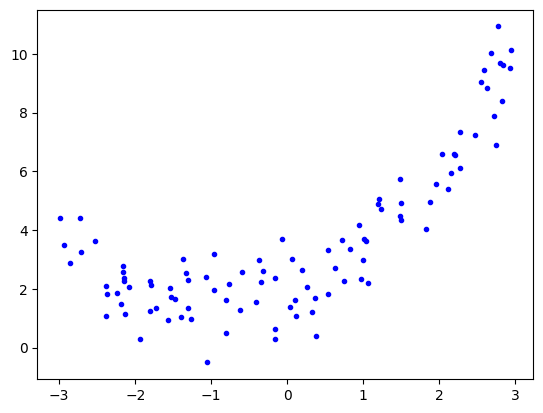

In [31]:
plt.plot(X, y, "b.")

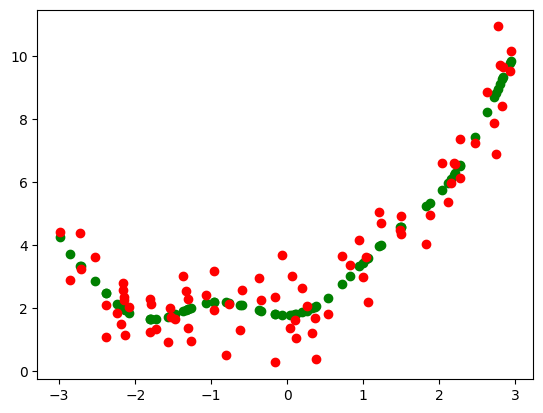

In [32]:
plt.scatter(X_train, poly_model.predict(X_train_poly), color='green')
plt.scatter(X_train, y_train, color='red')  

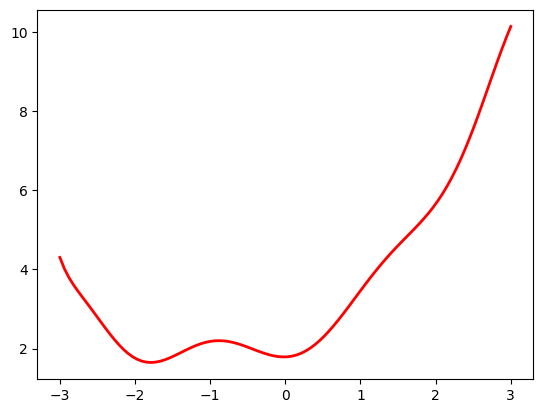

In [34]:
X_new = np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly.fit_transform(X_new)
y_new = poly_model.predict(X_new_poly)
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.show()

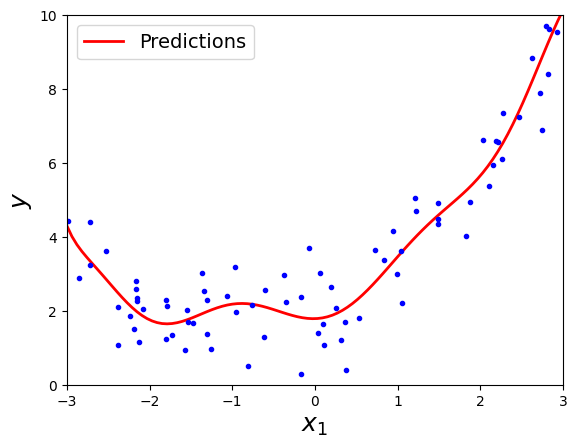

In [35]:
plt.plot(X_new , y_new, "r-", linewidth=2, label="Predictions")
plt.plot(X_train, y_train, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])
plt.show()

In [77]:
from sklearn.pipeline import Pipeline
def pipeline(X_train, y_train, X_test, y_test, degree):
    poly = PolynomialFeatures(degree=degree)  # Polynomial transformation
    lin_reg = LinearRegression()  # Linear regression model

    # Create a pipeline (Polynomial Transformation + Linear Regression)
    poly_reg = Pipeline([
        ('poly', poly), 
        ('lin_reg', lin_reg)
    ])

    # Fit on training data
    poly_reg.fit(X_train, y_train)

    # Generate a smooth range of X values for the prediction line
    X_range = np.linspace(X.min(), X.max(), 300).reshape(-1, 1)
    y_pred = poly_reg.predict(X_range)  # Predict smooth line

    # Plot
    plt.figure(figsize=(10, 6))

    # Plot Original Data
    plt.scatter(X, y, color="violet", alpha=0.6, label="Original Data")

    # Plot Training Data
    plt.scatter(X_train, y_train, color="red", label="Training Data", marker='o', edgecolors='black')

    # Plot Testing Data
    plt.scatter(X_test, y_test, color="blue", label="Testing Data", marker='s', edgecolors='black')

    # Plot Polynomial Regression Prediction Line
    plt.plot(X_range, y_pred, color="green", linewidth=3, label=f"Polynomial Regression (Degree {degree})")

    # Labels & Legends
    plt.xlabel("X Values")
    plt.ylabel("Target (y)")
    plt.title("Polynomial Regression with Prediction Line")
    plt.legend()
    plt.grid(True, linestyle="--", alpha=0.5)

    # Show plot
    plt.show()

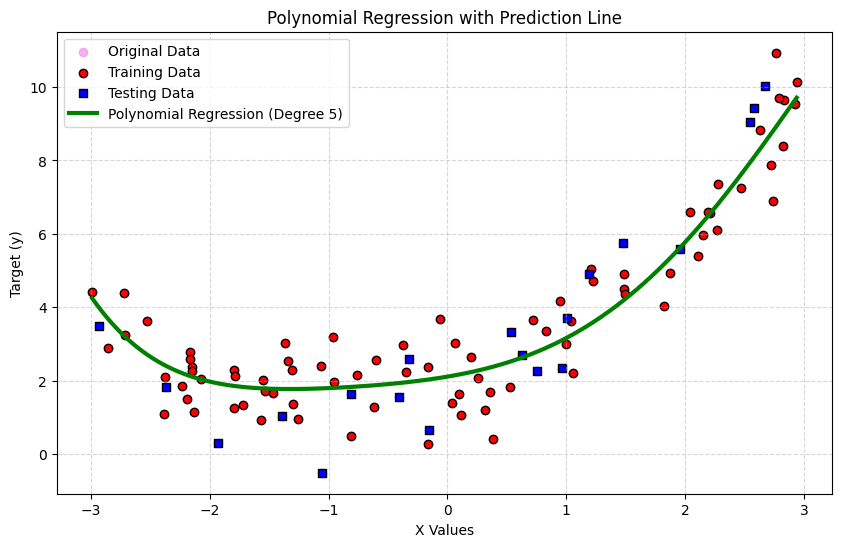

In [78]:
pipeline(X_train, y_train, X_test, y_test, degree=5)